In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

<Axes: >

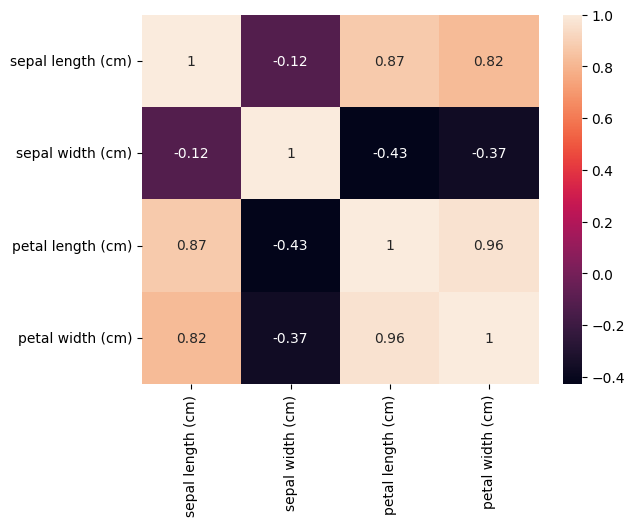

In [14]:
sns.heatmap(df.corr(), annot=True)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

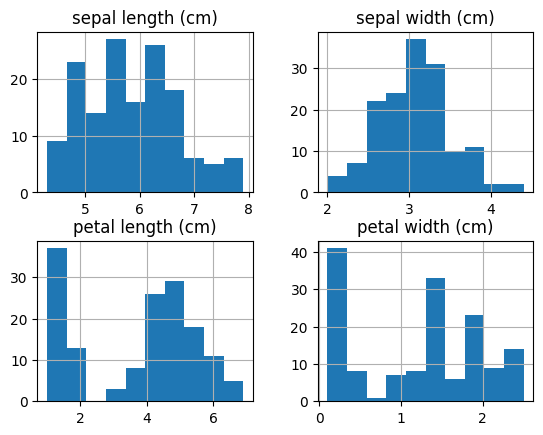

In [15]:
df.hist()

In [17]:
x = df.iloc[:,0:3].values

css =[]
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0).fit(x)
    css.append(kmeans.inertia_)

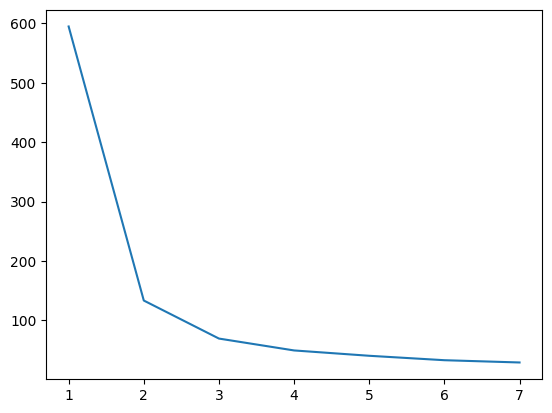

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,8), css)

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

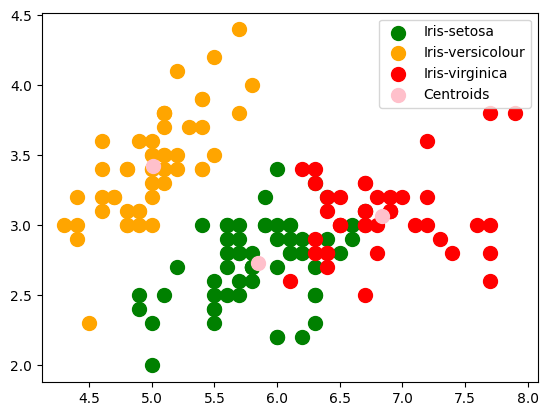

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'pink', label = 'Centroids')

plt.legend()
